In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
import statsmodels.stats.power as smp
from statsmodels.stats.power import TTestIndPower, TTestPower
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from statsmodels.stats.mediation import Mediation
from sklearn.decomposition import PCA
from scipy.stats import pearsonr





Qpilot = pd.read_excel('/Users/user/Clean_datant.xlsx')





Explained Variance for each component:
PC1: 49.08%
PC2: 8.64%


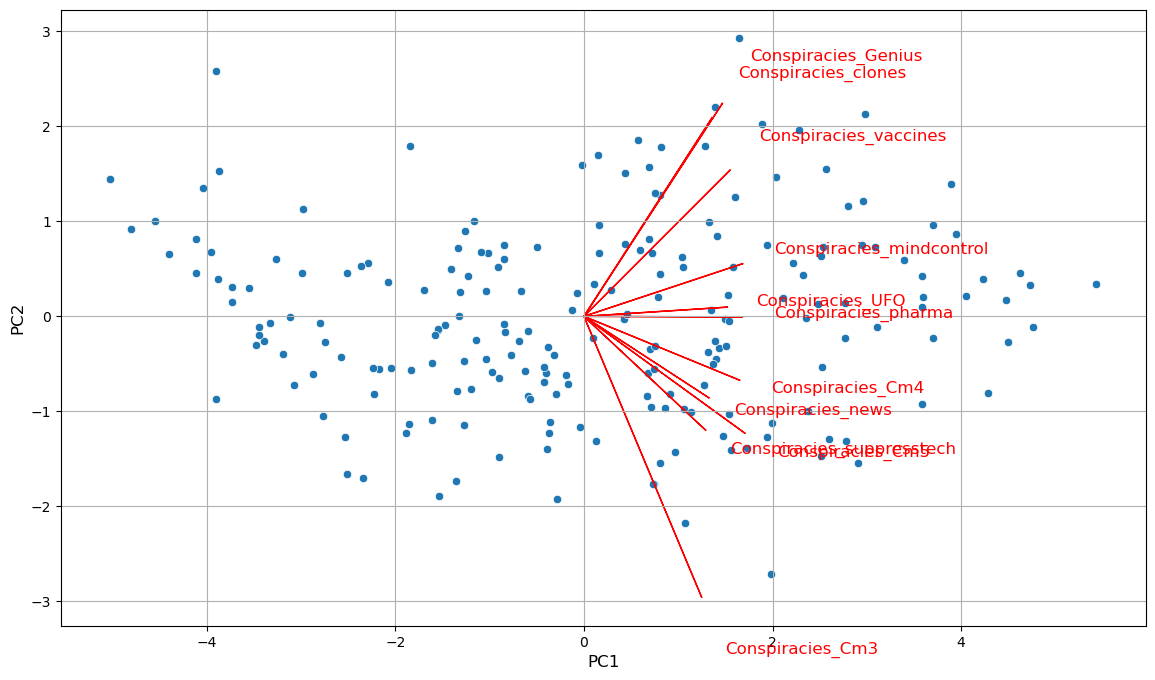

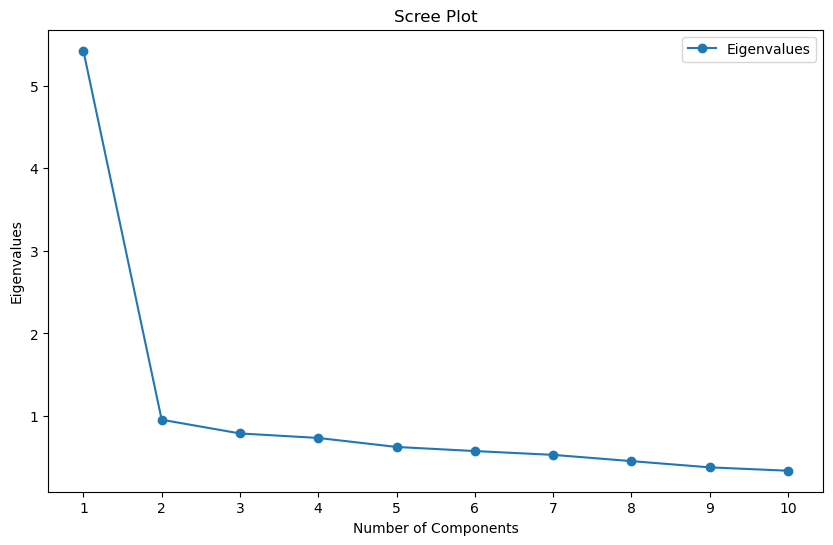

In [25]:


Conspiracy_sub = Qpilot[["Conspiracies_Cm3","Conspiracies_Cm4",
                   "Conspiracies_Cm5","Conspiracies_news","Conspiracies_pharma","Conspiracies_mindcontrol",
                    "Conspiracies_Genius", "Conspiracies_clones","Conspiracies_vaccines",
                   "Conspiracies_suppresstech","Conspiracies_UFO"]]


scaler = StandardScaler()
Conspiracy_scaled = scaler.fit_transform(Conspiracy_sub)


pca = PCA(n_components=2)
pca.fit(Conspiracy_scaled)




explained_variance = pca.explained_variance_ratio_
print("\nExplained Variance for each component:")
for i, exp_var in enumerate(explained_variance):
    print(f"PC{i+1}: {exp_var*100:.2f}%")


transformed_Conspiracy = pca.transform(Conspiracy_scaled)
Conspiracy_pca_df = pd.DataFrame(transformed_Conspiracy, columns=['PC1', 'PC2'])


scale_factor = 5
plt.figure(figsize=(14, 8))  
sns.scatterplot(x='PC1', y='PC2', data=Conspiracy_pca_df)

for i, variable in enumerate(Conspiracy_sub.columns):
    plt.arrow(0, 0, pca.components_[0, i]*scale_factor, pca.components_[1, i]*scale_factor, color='r')
    plt.text(pca.components_[0, i]*scale_factor*1.2, pca.components_[1, i]*scale_factor*1.2, variable, color='r', fontsize=12) 
plt.xlabel('PC1', fontsize=12)  
plt.ylabel('PC2', fontsize=12) 
plt.grid()
plt.show()


pca_all = PCA().fit(Conspiracy_scaled)
plt.figure(figsize=(10, 6))
components_to_display = min(10, len(pca_all.explained_variance_))
plt.plot(range(1, components_to_display + 1), pca_all.explained_variance_[:components_to_display], 'o-', label='Eigenvalues')
plt.xticks(ticks=range(1, components_to_display + 1), labels=[str(i) for i in range(1, components_to_display + 1)])  

plt.xlabel('Number of Components')
plt.ylabel('Eigenvalues')
plt.title('Scree Plot')
plt.legend()
plt.show()



Explained Variance for each component:
PC1: 22.88%
PC2: 18.40%


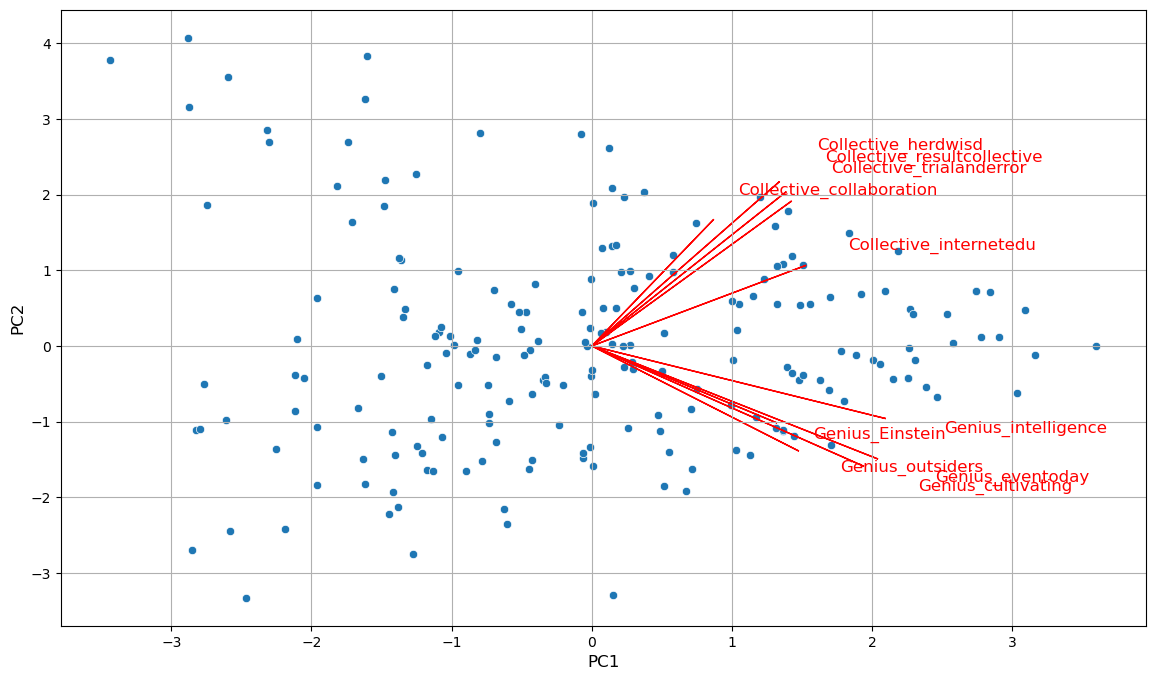

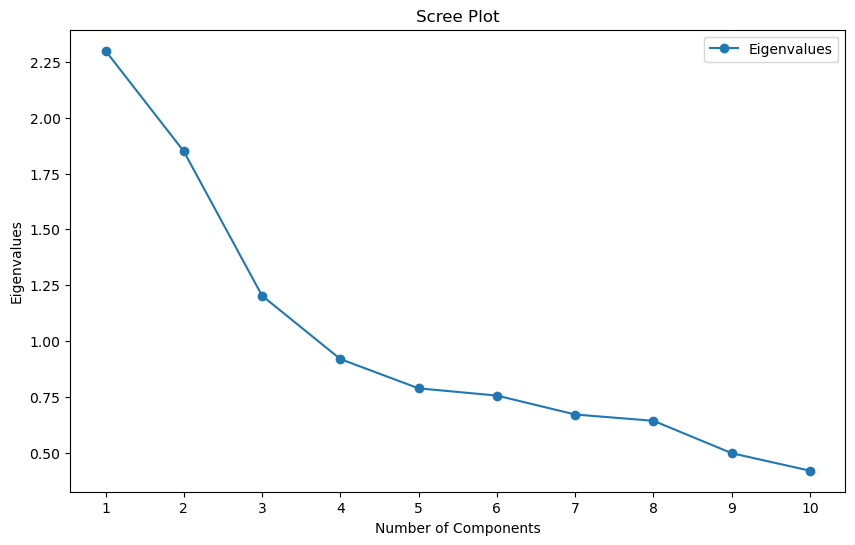

In [26]:

Genius_sub = Qpilot[["Genius_Einstein", "Genius_intelligence", "Genius_cultivating",
                     "Genius_eventoday", "Genius_outsiders", "Collective_collaboration",
                     "Collective_herdwisd", "Collective_internetedu", "Collective_trialanderror",
                     "Collective_resultcollective"]]


scaler = StandardScaler()
Genius_scaled = scaler.fit_transform(Genius_sub)

pca_initial = PCA(n_components=2)
pca_initial.fit(Genius_scaled)


transformed_Genius_initial = pca_initial.transform(Genius_scaled)
Genius_pca_df = pd.DataFrame(transformed_Genius_initial, columns=['PC1', 'PC2'])


outliers = Genius_pca_df[Genius_pca_df['PC1'] > 3].index


Genius_sub_cleaned = Genius_sub.drop(outliers, axis=0)
Genius_scaled_cleaned = scaler.fit_transform(Genius_sub_cleaned)


pca = PCA(n_components=2)
pca.fit(Genius_scaled_cleaned)



explained_variance = pca.explained_variance_ratio_
print("\nExplained Variance for each component:")
for i, exp_var in enumerate(explained_variance):
    print(f"PC{i+1}: {exp_var*100:.2f}%")


transformed_Genius_cleaned = pca.transform(Genius_scaled_cleaned)
Genius_pca_df_cleaned = pd.DataFrame(transformed_Genius_cleaned, columns=['PC1', 'PC2'])


scale_factor = 5
plt.figure(figsize=(14, 8))  
sns.scatterplot(x='PC1', y='PC2', data=Genius_pca_df_cleaned)

for i, variable in enumerate(Genius_sub_cleaned.columns):
    plt.arrow(0, 0, pca.components_[0, i]*scale_factor, pca.components_[1, i]*scale_factor, color='r')
    plt.text(pca.components_[0, i]*scale_factor*1.2, pca.components_[1, i]*scale_factor*1.2, variable, color='r', fontsize=12)  # Increased font size

plt.xlabel('PC1', fontsize=12)  
plt.ylabel('PC2', fontsize=12)  
plt.grid()
plt.show()


pca_all = PCA().fit(Genius_scaled_cleaned)
plt.figure(figsize=(10, 6))
components_to_display = min(10, len(pca_all.explained_variance_))
plt.plot(range(1, components_to_display + 1), pca_all.explained_variance_[:components_to_display], 'o-', label='Eigenvalues')
plt.xticks(ticks=range(1, components_to_display + 1), labels=[str(i) for i in range(1, components_to_display + 1)])  


plt.xlabel('Number of Components')
plt.ylabel('Eigenvalues')
plt.title('Scree Plot')
plt.legend()
plt.show()



Explained Variance for each component:
PC1: 32.14%
PC2: 22.03%


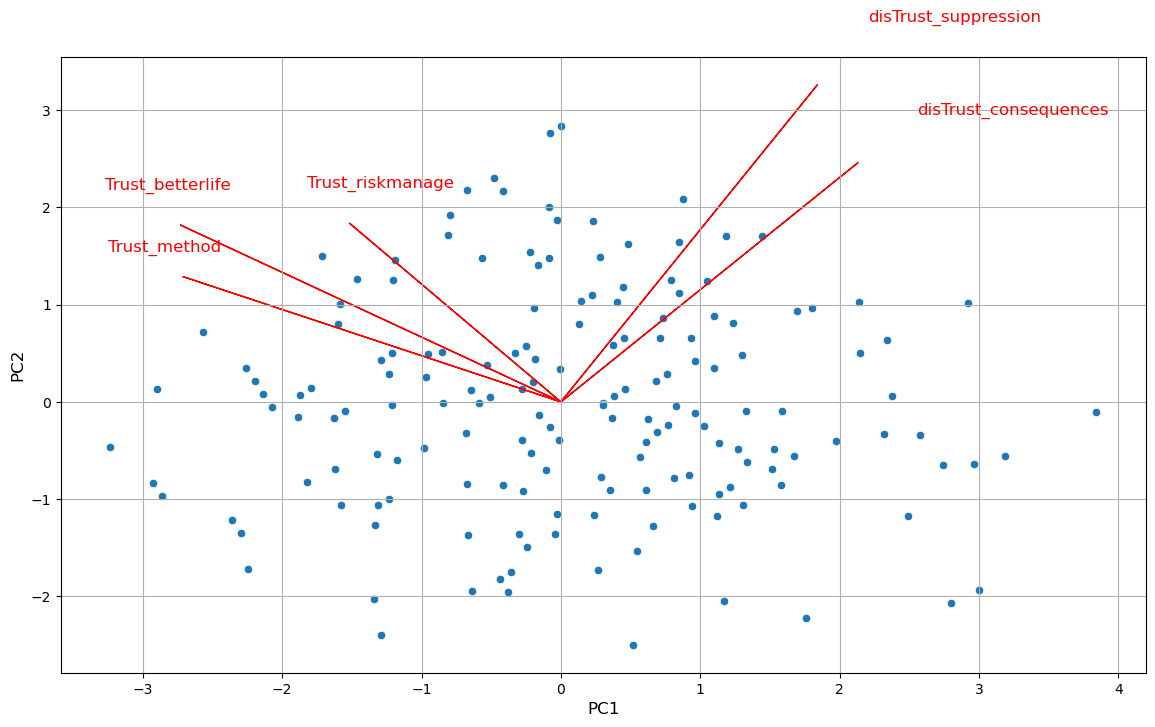

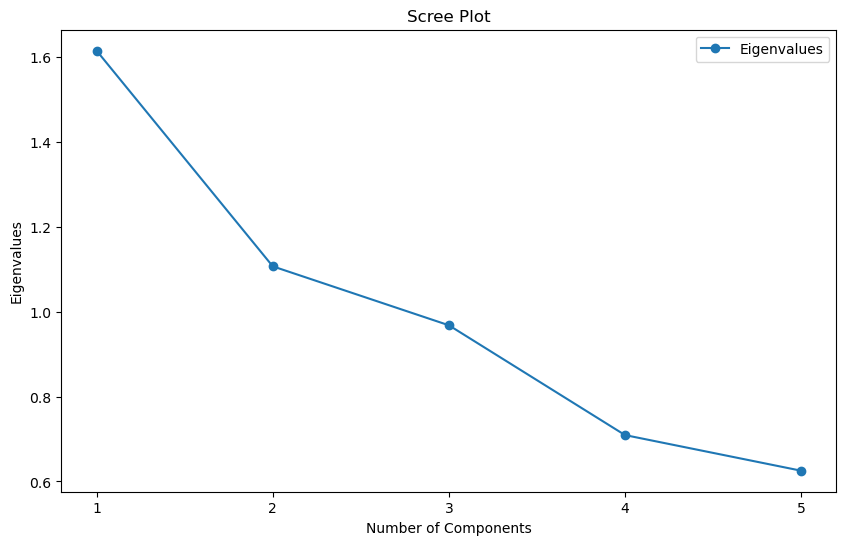

In [27]:

Trust_sub = Qpilot[["Trust_method", "disTrust_suppression", "Trust_riskmanage",
                    "Trust_betterlife", "disTrust_consequences"]]


scaler = StandardScaler()
Trust_scaled = scaler.fit_transform(Trust_sub)


pca = PCA(n_components=2)
pca.fit(Trust_scaled)


explained_variance = pca.explained_variance_ratio_
print("\nExplained Variance for each component:")
for i, exp_var in enumerate(explained_variance):
    print(f"PC{i+1}: {exp_var*100:.2f}%")

transformed_Trust = pca.transform(Trust_scaled)
Trust_pca_df = pd.DataFrame(transformed_Trust, columns=['PC1', 'PC2'])


scale_factor = 5
plt.figure(figsize=(14, 8)) 
sns.scatterplot(x='PC1', y='PC2', data=Trust_pca_df)

for i, variable in enumerate(Trust_sub.columns):
    plt.arrow(0, 0, pca.components_[0, i]*scale_factor, pca.components_[1, i]*scale_factor, color='r')
    plt.text(pca.components_[0, i]*scale_factor*1.2, pca.components_[1, i]*scale_factor*1.2, variable, color='r', fontsize=12)  # Increased font size

plt.xlabel('PC1', fontsize=12)  
plt.ylabel('PC2', fontsize=12)  
plt.grid()
plt.show()


pca_all = PCA().fit(Trust_scaled)
plt.figure(figsize=(10, 6))
components_to_display = min(10, len(pca_all.explained_variance_))
plt.plot(range(1, components_to_display + 1), pca_all.explained_variance_[:components_to_display], 'o-', label='Eigenvalues')
plt.xticks(ticks=range(1, components_to_display + 1), labels=[str(i) for i in range(1, components_to_display + 1)])  # Set integer labels


plt.xlabel('Number of Components')
plt.ylabel('Eigenvalues')
plt.title('Scree Plot')
plt.legend()
plt.show()



Explained Variance for each component:
PC1: 25.20%
PC2: 8.81%


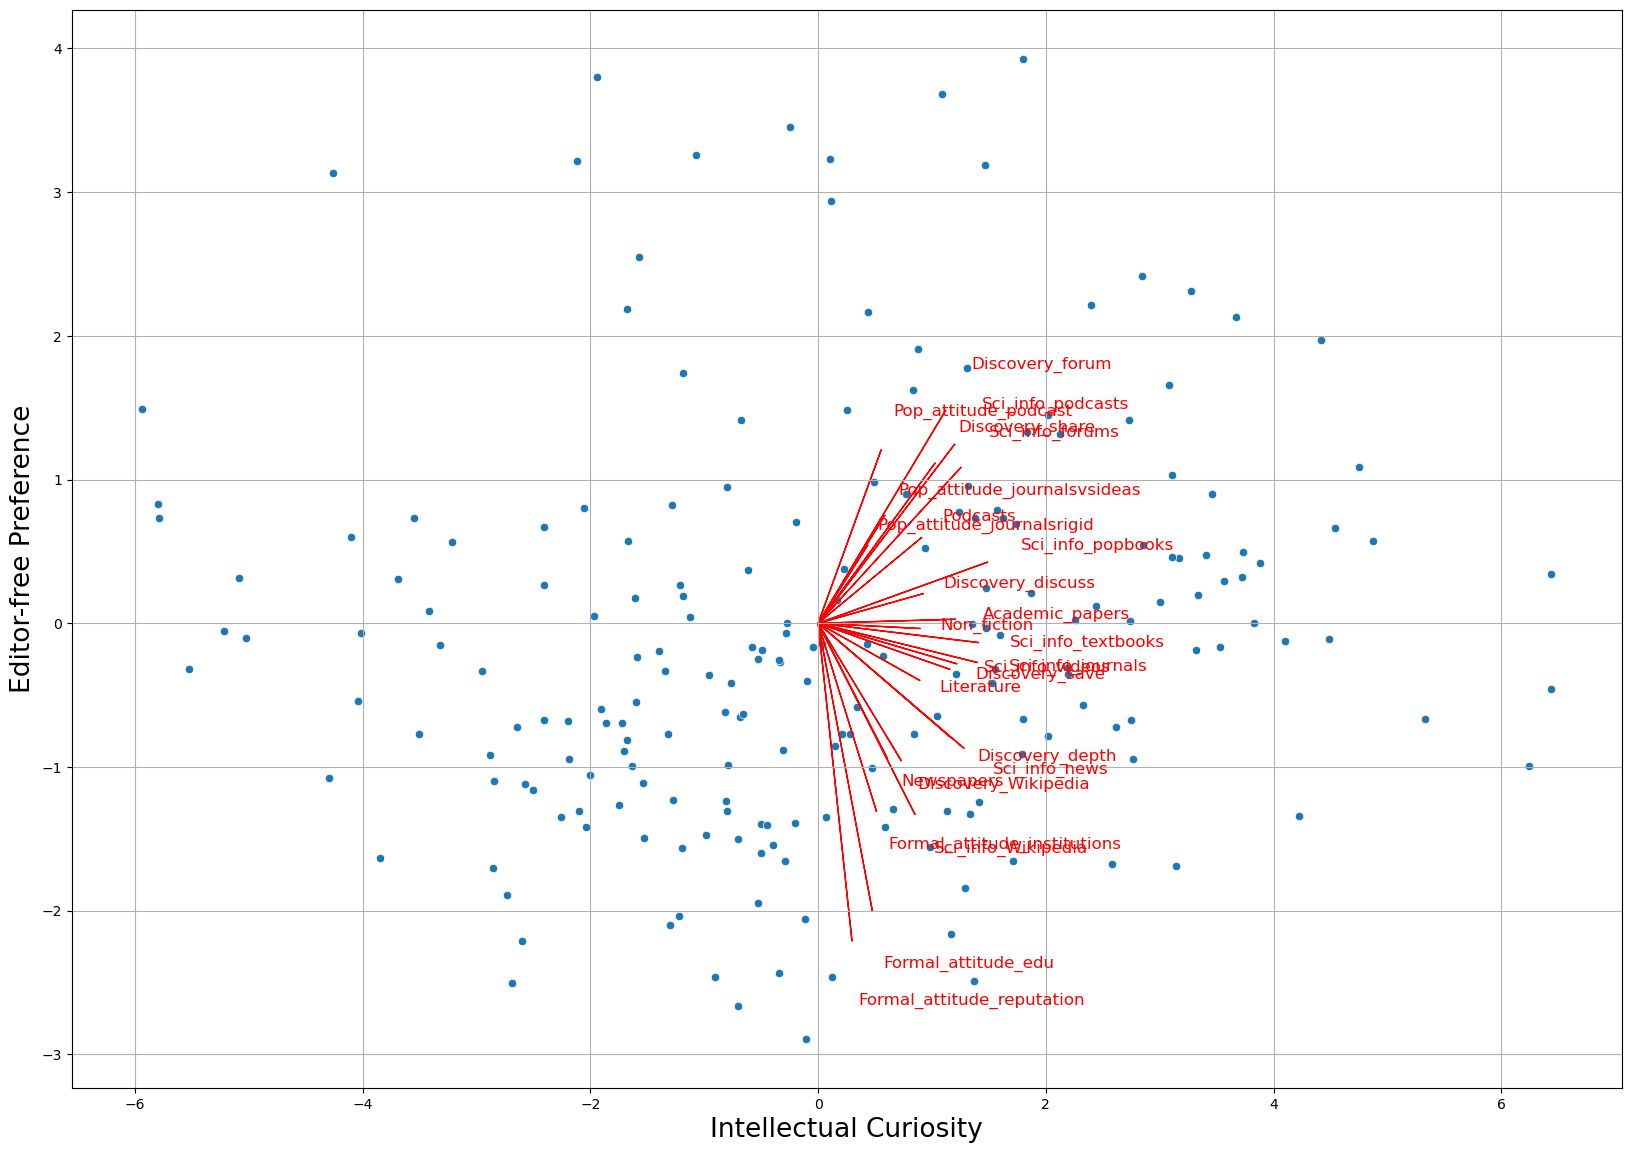

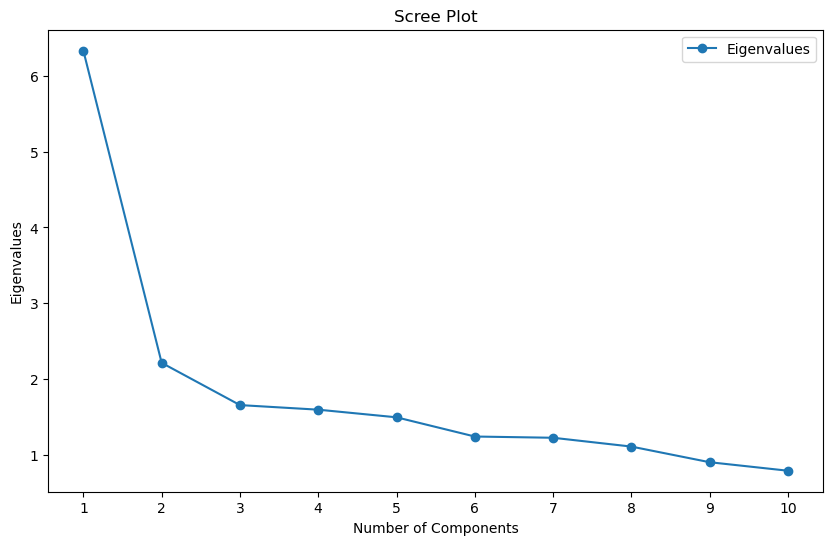

In [29]:

Formal_sub = Qpilot[["Literature", "Non_fiction", "Newspapers", "Podcasts", 
            "Academic_papers", 
            "Discovery_share", "Discovery_depth", 
            "Discovery_save", "Discovery_discuss", "Discovery_forum", 
            "Discovery_Wikipedia",
            "Sci_info_news", "Sci_info_videos", 
            "Sci_info_podcasts", "Sci_info_popbooks", "Sci_info_forums", 
            "Sci_info_journals", "Sci_info_textbooks", "Sci_info_Wikipedia",
            'Pop_attitude_podcast', 'Pop_attitude_journalsrigid', 'Pop_attitude_journalsvsideas',
            'Formal_attitude_reputation','Formal_attitude_edu','Formal_attitude_institutions']]


scaler = StandardScaler()
Formal_scaled = scaler.fit_transform(Formal_sub)


pca_initial = PCA(n_components=2)
pca_initial.fit(Formal_scaled)


transformed_Formal_initial = pca_initial.transform(Formal_scaled)
Formal_pca_df_initial = pd.DataFrame(transformed_Formal_initial, columns=['PC1', 'PC2'])


Formal_pca_df_cleaned = Formal_pca_df_initial[(Formal_pca_df_initial['PC2'] >= -4) & (Formal_pca_df_initial['PC2'] <= 4)]
indices_to_keep = Formal_pca_df_cleaned.index
Formal_sub_cleaned = Formal_sub.loc[indices_to_keep]


Formal_scaled_cleaned = scaler.fit_transform(Formal_sub_cleaned)


pca_cleaned = PCA(n_components=2)
pca_cleaned.fit(Formal_scaled_cleaned)




explained_variance_cleaned = pca_cleaned.explained_variance_ratio_
print("\nExplained Variance for each component:")
for i, exp_var in enumerate(explained_variance_cleaned):
    print(f"PC{i+1}: {exp_var*100:.2f}%")



scale_factor = 5
plt.figure(figsize=(20, 14)) 
sns.scatterplot(x='PC1', y='PC2', data=Formal_pca_df_cleaned)

for i, variable in enumerate(Formal_sub.columns):
    plt.arrow(0, 0, pca_cleaned.components_[0, i]*scale_factor, pca_cleaned.components_[1, i]*scale_factor, color='r')
    plt.text(pca_cleaned.components_[0, i]*scale_factor*1.2, pca_cleaned.components_[1, i]*scale_factor*1.2, variable, color='r', fontsize=12)  # Increased font size

plt.xlabel('Intellectual Curiosity', fontsize=19) 
plt.ylabel('Editor-free Preference', fontsize=19)  
plt.grid()
plt.show()


pca_all = PCA().fit(Formal_scaled_cleaned)
plt.figure(figsize=(10, 6))


components_to_display = min(10, len(pca_all.explained_variance_))
plt.plot(range(1, components_to_display + 1), pca_all.explained_variance_[:components_to_display], 'o-', label='Eigenvalues')
plt.xticks(ticks=range(1, components_to_display + 1), labels=[str(i) for i in range(1, components_to_display + 1)])  # Set integer labels


plt.xlabel('Number of Components')
plt.ylabel('Eigenvalues')
plt.title('Scree Plot')
plt.legend()
plt.show()


